checking the basic implementation of op on a sliding window

In [101]:
def op(S) :
    p_cost = [sum(triple) for triple in zip(S["F"],S["C"],S["B"])]
    S["F"].append(min(p_cost))
    S["cpts"].append(len(S["F"]) - p_cost.index(S["F"][-1]) - 1)
    F0 = S["F"][0]
    for i in range(len(S["F"])) :
        S["F"][i] = S["F"][i] - F0
    return(S)

In [102]:
def penalty(S,beta) :
    S["B"].append(beta)
    S["B"][0] = 0.0
    return(S)

In [103]:
def cost(S) :
    S["C"] = [(S["SXX"][-1] - sxx) - (S["SX"][-1] - sx)*(S["SX"][-1] - sx)/n for sx,sxx,n in zip(S["SX"],S["SXX"],list(range(len(S["SX"])-1,0,-1)))]
    return(S)

In [104]:
def sumstats(S,x) :
    S["SX"].append(S["SX"][-1]+x)
    S["SXX"].append(S["SXX"][-1]+x*x)
    SX0 = S["SX"][0]
    SXX0 = S["SXX"][0]
    for i in range(len(S["SX"])) :
        S["SX"][i] = S["SX"][i]-SX0
        S["SXX"][i] = S["SXX"][i]-SXX0
    return(S)

In [105]:
from collections import deque
def initialise(w) :
    return({"C" : None,
            "B" : deque([],w),
            "F" : deque([0.0],w),
            "SX" : deque([0.0],w+1),
            "SXX" : deque([0.0],w+1),
            "cpts" : deque([],w)
    })

test the effects of sliding window (no noise)

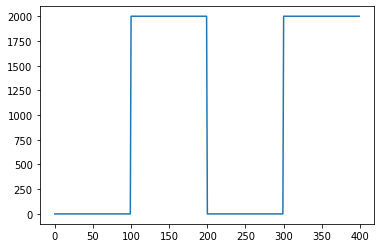

In [106]:
X = [0 for i in range(100)] + [2000 for i in range(100)] + [0 for i in range(100)] + [2000 for i in range(100)]
import matplotlib.pyplot as plt
plt.plot(X)
plt.show()

In [107]:
beta = 1.0
w = 400
S = initialise(w)
for x in X :
    S = sumstats(S,x)
    S = penalty(S,beta)
    S = cost(S)
    S = op(S)

In [108]:
print(S["cpts"])

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55

now add some noise and see what happens

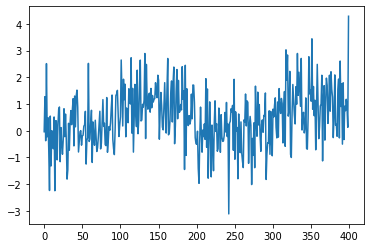

In [109]:
import numpy as np
X = [0 for i in range(100)] + [1 for i in range(100)] + [0 for i in range(100)] + [1 for i in range(100)]
E = np.random.normal(0,1, len(X))
X = [x + e for x,e in zip(X,E)]
plt.plot(X)
plt.show()

In [110]:
from math import log
beta = 2*log(len(X))
w = 400
S = initialise(w)
for x in X :
    S = sumstats(S,x)
    S = penalty(S,beta)
    S = cost(S)
    S = op(S)
print(S["cpts"])

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50

In [111]:
X = X + X
beta = 2*log(len(X))
w = 400
S = initialise(w)
for x in X :
    S = sumstats(S,x)
    S = penalty(S,beta)
    S = cost(S)
    S = op(S)
print(S["cpts"])

deque([100, 101, 102, 103, 104, 105, 106, 107, 108, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,